In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import os
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyaldata import *

# Load data

In [3]:
data_dir = "/Users/bagibence/Box Sync/Imperial/data/"
fname = os.path.join(data_dir, "Chewie_CO_CS_2016-10-21.mat")

In [4]:
# load TrialData .mat file into a DataFrame
df = mat2dataframe(fname, True)

In [5]:
df.head()

,monkey,date,task,target_direction,trial_id,result,bin_size,perturbation,perturbation_info,epoch,...,idx_peak_speed,idx_trial_end,pos,vel,acc,force,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,Chewie,10-21-2016,CO,0.785398,1,R,0.01,CS,-0.52,BL,...,369,446,"[[5.778064202616431, -35.397015549165786], [5....","[[-0.7793813732066821, 4.136785603960551], [-1...","[[-51.969786428074926, 14.202847093285325], [-...","[[0.12316992347195488, 0.2506054987408934], [0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
1,Chewie,10-21-2016,CO,1.570796,2,R,0.01,CS,-0.52,BL,...,312,374,"[[5.749738457404149, -24.643406091404042], [5....","[[1.9163909188240478, -2.763349295373866], [1....","[[-36.779409320972285, 1.7821809867372298], [-...","[[0.3685575721810173, 0.17911060954700603], [0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
2,Chewie,10-21-2016,CO,-1.570796,3,R,0.01,CS,-0.52,BL,...,341,405,"[[-0.08846028882207335, -21.796383214740942], ...","[[0.6600912719115256, -4.014682191879345], [0....","[[15.812499710917256, 16.621785484272777], [10...","[[0.3523246575179767, -0.09122904723894733], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
3,Chewie,10-21-2016,CO,3.141593,4,R,0.01,CS,-0.52,BL,...,269,326,"[[0.2044172614704891, -37.980265533779594], [0...","[[4.529933995107801, 4.629844429981232], [4.06...","[[-39.8450200830264, 25.037788333969146], [-48...","[[0.16886748091580156, 0.07539164418520175], [...","[[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
4,Chewie,10-21-2016,CO,-2.356194,5,R,0.01,CS,-0.52,BL,...,347,414,"[[-8.487759048702024, -29.610739441410566], [-...","[[3.3872550577518203, -0.3581721292107508], [4...","[[88.37767895758228, -30.26694467609077], [95....","[[0.5500420770141063, -0.39266117674997386], [...","[[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."


# Preprocess 

## combine bins into longer ones

In [5]:
df.head().bin_size

0    0.01
1    0.01
2    0.01
3    0.01
4    0.01
Name: bin_size, dtype: float64

In [6]:
td = combine_time_bins(df, 2)
td.head().bin_size

0    0.02
1    0.02
2    0.02
3    0.02
4    0.02
Name: bin_size, dtype: float64

In [7]:
# time-varying signals have new time coordinates
print(df.M1_spikes[0].shape)
print(td.M1_spikes[0].shape)

(457, 84)
(228, 84)


In [8]:
td = remove_low_firing_neurons(td, "M1_spikes", 5)
td = remove_low_firing_neurons(td, "PMd_spikes", 5)

td.M1_spikes[0].shape

/Users/bagibence/Box Sync/Imperial/PyalData/pyaldata/tools.py:979: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


(228, 63)

In [9]:
td = transform_signal(td, "M1_spikes", 'sqrt')
td = transform_signal(td, "PMd_spikes", 'sqrt')

# alternatively
#df = sqrt_transform_signal(df, "M1_spikes", "sqrt")

td.M1_spikes[0] ** 2

array([[0., 0., 0., ..., 2., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 2., 1., 0.]])

In [10]:
td = merge_signals(td, ["M1_spikes", "PMd_spikes"], "both_spikes")
td.both_spikes[0].shape

In [12]:
# works on "_spikes" fields
td = add_firing_rates(td, 'smooth')

# for other fields use smooth_signals()

<AxesSubplot:>

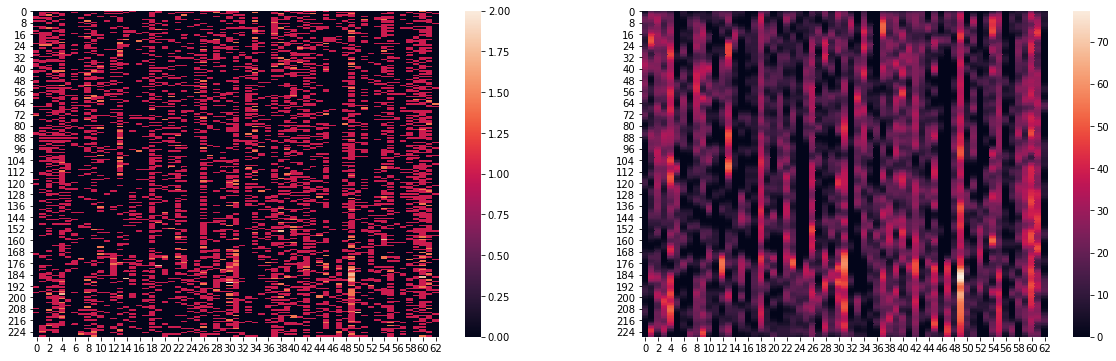

In [13]:
fig, ax = plt.subplots(figsize = (20, 6), ncols = 2)

sns.heatmap(td.M1_spikes[0], ax=ax[0])
sns.heatmap(td.M1_rates[0], ax=ax[1])

In [14]:
@utils.copy_td
def select_trials(trial_data, query_str, reset_index=True):
    """
    query : str, function, mask, indices
    """
    if reset_index:
        return trial_data.query(query_str).reset_index(drop=True)
    else:
        return trial_data.query(query_str)

In [82]:
# select only the successful trials
print(td.shape[0])

td = select_trials(td, "result == 'R'")

print(td.shape[0])

286
286


In [93]:
# we could rename before and after to rel_start and rel_end or something similar
move_td = restrict_to_interval(td, "idx_movement_on", before=0, after=40)

print(td.both_rates[0].shape)
print(move_td.both_rates[0].shape)

(228, 172)
(41, 172)


In [94]:
# center per time point
move_td = subtract_cross_condition_mean(move_td)

In [95]:
# new issue: stack trials

concat_trials(move_td, "both_rates").shape

(11726, 172)

In [96]:
from sklearn.decomposition import PCA

In [106]:
pca_dims = 15

move_td = tools.dim_reduce(move_td, PCA(pca_dims), "M1_rates",   "M1_proj")
move_td = tools.dim_reduce(move_td, PCA(pca_dims), "PMd_rates",  "PMd_proj")
move_td = tools.dim_reduce(move_td, PCA(pca_dims), "both_rates", "both_proj")

In [107]:
move_td["both_proj"][0].shape

(41, 15)

In [108]:
move_td['target_id'] = move_td.apply(lambda trial: int(np.round((trial.target_direction + np.pi) / (0.25*np.pi))) - 1,
                                     axis = 1)

In [109]:
av_per_dir = trial_average(move_td, "target_id")

In [23]:
av_per_dir

,target_direction,bin_size,perturbation_info,idx_trial_start,idx_target_on,idx_go_cue,idx_movement_on,idx_peak_speed,idx_trial_end,pos,...,M1_unit_guide,PMd_spikes,PMd_unit_guide,both_spikes,M1_rates,PMd_rates,both_rates,M1_proj,PMd_proj,both_proj
-2.356194,-2.356194,0.02,-0.52,NaN,10.947368,45.500000,60.0,NaN,NaN,"[[0.2106826151842064, -29.90345997855824], [0....",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.2631578947368421, 0.10526315789473684, 0.5...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [0.263157...","[[0.18421052631578946, 0.34210526315789475, 0....","[[8.450363692978774, 10.604467084365503, 20.19...","[[10.66671737379504, 4.441303764684086, 23.517...","[[8.450363692978774, 10.604467084365503, 20.19...","[[10.447492526357419, -15.623925081248995, 4.9...","[[-5.783101008304498, 7.066515609862703, -11.0...","[[-3.1335000415358762, 17.88186264795241, -12...."
-1.570796,-1.570796,0.02,-0.52,NaN,13.666667,46.264706,60.0,NaN,NaN,"[[0.21796860571479973, -29.857718913091748], [...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.20588235294117646, 0.029411764705882353, 0...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[0.14705882352941177, 0.11764705882352941, 0....","[[8.754377696742246, 7.519167124349359, 19.885...","[[9.957076467187541, 3.9100696253169964, 19.53...","[[8.754377696742246, 7.519167124349359, 19.885...","[[11.476059738111026, -12.59427005495891, 6.57...","[[-2.0639314952297743, 11.719397677118714, -6....","[[2.4601233654778953, 18.011766729211207, -6.2..."
-0.785398,-0.785398,0.02,-0.52,NaN,10.400000,46.210526,60.0,NaN,NaN,"[[0.27660165079332105, -29.91799239310967], [0...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.15789473684210525, 0.13157894736842105, 0....","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [0.263157...","[[0.10526315789473684, 0.2631578947368421, 0.2...","[[9.39809075724305, 9.868507249216831, 17.7230...","[[8.555919690494514, 4.478035971702621, 18.890...","[[9.39809075724305, 9.868507249216831, 17.7230...","[[8.83489036822123, -13.839549795471486, 11.69...","[[3.0629004446189727, 3.06497642974923, -9.213...","[[5.764581699366324, 10.437135757270893, -12.3..."
0.000000,0.000000,0.02,-0.52,NaN,11.444444,46.676471,60.0,NaN,NaN,"[[0.23703422536139568, -29.80662263579981], [0...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.3235294117647059, 0.058823529411764705, 0....","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[0.20588235294117646, 0.17647058823529413, 0....","[[8.79912931756688, 9.163193381622623, 18.2911...","[[12.924823024323171, 2.740741158933666, 19.59...","[[8.79912931756688, 9.163193381622623, 18.2911...","[[13.637807986041404, -6.579848140892407, 4.95...","[[6.59254377753734, -2.1885517915442128, -12.7...","[[9.674607770778827, 9.878765239749237, -17.01..."
0.785398,0.785398,0.02,-0.52,NaN,14.583333,46.454545,60.0,NaN,NaN,"[[0.31906677147268847, -29.758718975732478], [...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.12121212121212122, 0.12121212121212122, 0....","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[0.18181818181818182, 0.24242424242424243, 0....","[[6.923725733250186, 10.87741457294212, 20.505...","[[11.333816101356922, 6.544480647646495, 20.21...","[[6.923725733250186, 10.87741457294212, 20.505...","[[13.531511220376796, -6.639801801299522, 7.08...","[[7.998829955822668, 1.4603849331302796, -18.7...","[[12.341303211366325, 12.54486019158461, -20.0..."
1.570796,1.570796,0.02,-0.52,NaN,10.250000,46.194444,60.0,NaN,NaN,"[[0.2705106598519752, -29.754436495768157], [0...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.2222222222222222, 0.03928371006591931, 0.3...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[0.1111111111111111, 0.3055555555555556, 0.30...","[[7.913157031686437, 12.143054837637044, 17.67...","[[10.567191772934986, 1.895423574340226, 18.31...","[[7.913157031686437, 12.143054837637044, 17.67...","[[14.07450054941564, -12.866831201377408, 6.39...

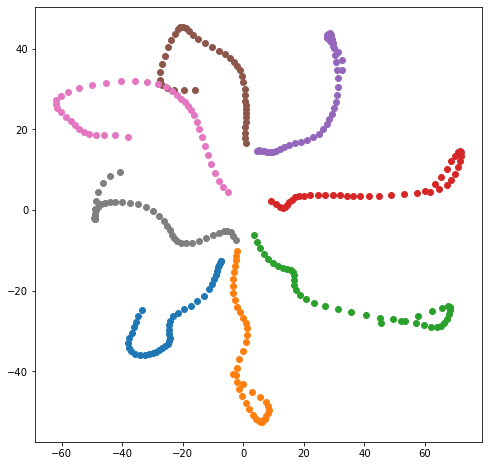

In [110]:
fig, ax = plt.subplots(figsize = (8, 8))

for dir_proj in av_per_dir["both_proj"]:
    ax.scatter(*dir_proj[:, :2].T)

In [111]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [112]:
X = concat_trials(move_td, "both_proj")
y = concat_trials(move_td, "vel")

In [118]:
cv_scores = cross_val_score(Ridge(), X, y, cv = 5)

In [120]:
cv_scores.mean()

0.8103138289186805

In [121]:
move_td = add_norm(move_td, "vel")

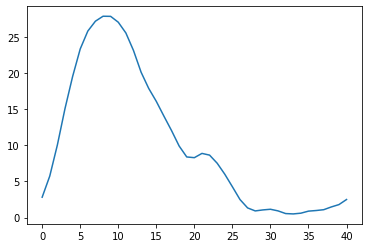

In [123]:
plt.plot(move_td.vel_norm[0])